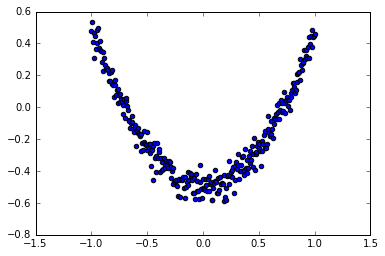

0.17951109559
0.0124987794618
0.00859236278063
0.00722124813519
0.0063976931182
0.00579084720718
0.00533578521502
0.00495930202004
0.00467126198877
0.004444652979
0.00426212455479
0.00412091441876
0.00400685586274
0.00390695023813
0.00381744786511
0.00373835586242
0.00365971216764
0.00358824507252
0.00351973093778
0.0034577052549


In [5]:
import theano
import numpy as np
import theano.tensor as T
import matplotlib.pyplot as plt

class Layer(object):
    def __init__(self,inputs,in_size,out_size,activation_function=None):
        self.W = theano.shared(np.random.normal(0,1,(in_size,out_size)))
        self.b = theano.shared(np.zeros((out_size,)) + 0.1)
        self.Wx_plus_b = T.dot(inputs,self.W) + self.b
        self.activation_function = activation_function
        if activation_function is None:
            self.outputs = self.Wx_plus_b
        else:
            self.outputs = self.activation_function(self.Wx_plus_b)
"""
l1 = Layer(inputs,in_size=1,out_size=10,activation_funcction)
l2 = Layer(l1.output,10,2,None)
"""

#制作 假数据
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
#显示 假数据
plt.scatter(x_data,y_data)
plt.show()

 
#定义输入 类型
x = T.dmatrix('x')
y = T.dmatrix('y')

#添加层
l1 = Layer(x,1,10,T.nnet.relu)
l2 = Layer(l1.outputs,10,1,None)
#损失
cost = T.mean(T.square(l2.outputs - y))
#计算梯度
gW1,gb1,gW2,gb2 = T.grad(cost,[l1.W,l1.b,l2.W,l2.b])
#开始下降
learning_rate = 0.05
train = theano.function(
        inputs=[x,y],
        outputs = cost,
        updates = [(l1.W,l1.W-learning_rate*gW1),
                  (l1.b,l1.b-learning_rate*gb1),
                  (l2.W,l2.W-learning_rate*gW2),
                  (l2.b,l2.b-learning_rate*gb2)]
            )
#prediction
predict = theano.function(inputs = [x],outputs = l2.outputs)

for i in range(1000):
    #training
    err = train(x_data,y_data)
    if i%50 == 0:
        print err


